# Exploration 01
*Anders Poirel*

Some experimentation with data-preprocessing.

Necassary imports:

In [70]:
import tensorflow as tf
import json
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
dataset_file = open('../data/raw/data_train.json', 'r')

In [88]:
dataset = json.load(dataset_file)

In [25]:
dataset[1:10]

[{'stars': 5.0,
  'useful': 0,
  'funny': 0,
  'cool': 0,
  'text': "I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon!  I'm always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level!  \n\nTravis's greets you with his perfectly green swoosh in his otherwise perfectly styled black hair and a Vegas-worthy rockstar outfit.  Next comes the most relaxing and incredible shampoo -- where you get a full head message that could cure even the very worst migraine in minutes --- and the scented shampoo room.  Travis has freakishly strong fingers (in a good way) and use the perfect amount of pressure.  That was superb!  Then starts the glorious blowout... where not one, not two, but THREE people were involved in doing the best round-brush action my hair has ever seen.  The team of stylists clearly gets along extremely well, as it's evident from the way they talk to and help one another that i

In [93]:
ratings = tf.convert_to_tensor([item['stars'] for item in dataset])
reviews = tf.convert_to_tensor([item['text'] for item in dataset])
cool = tf.convert_to_tensor([item['cool'] for item in dataset])
useful = tf.convert_to_tensor([item['useful'] for item in dataset])
funny = tf.convert_to_tensor([item['funny'] for item in dataset])


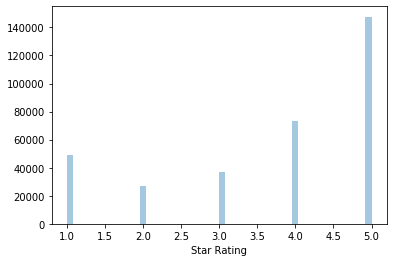

In [91]:
sns.distplot(ratings, kde = False, axlabel = 'Star Rating')

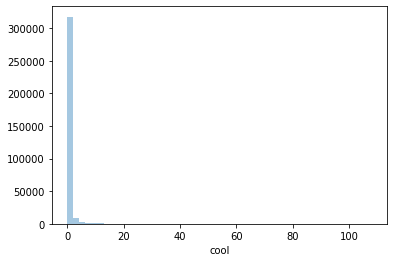

In [62]:
sns.distplot(cool, kde = False, axlabel = 'cool')

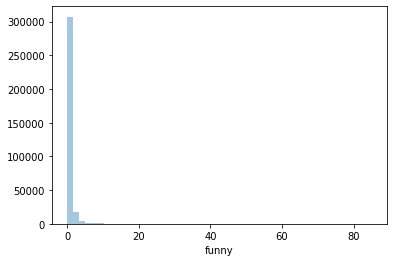

In [81]:
sns.distplot(funny, kde = False, axlabel = 'funny')

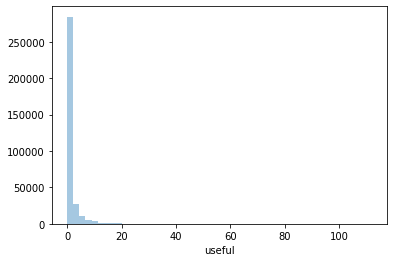

In [64]:
sns.distplot(useful, kde = False, axlabel = 'useful')

In [74]:
dataset_frame = pd.DataFrame({'rating': ratings, 'cool': cool, 'funny': funny, 'useful': useful})

In [77]:
dataset_frame['useful'].unique()

array([  6,   0,   3,   7,   5,   1,   9,   4,   2,  11,  14,   8,  10,
        23,  13,  18,  16,  12,  17,  42,  28,  22,  31,  34,  27,  20,
        32,  21,  19,  15,  61,  91,  47,  36,  38,  35,  29,  24,  30,
        33,  46,  40,  25,  55,  87,  43,  48,  71,  26,  56,  37,  45,
        41, 101,  39,  58,  53,  44,  60,  66,  75,  50,  52,  83,  76,
        67,  63,  84,  62,  54,  74,  82,  64,  59,  94,  51,  57, 112,
        72,  65,  97,  68,  49, 104,  86,  81,  88,  90,  77, 108,  93],
      dtype=int64)

In [79]:
dataset_frame['cool'].unique()

array([  0,   5,   1,   9,   4,   6,  11,   3,   2,   7,  15,  10,  26,
        22,  12,  17,  18,  25,   8,  21,  20,  59,  86,  55,  30,  13,
        23,  16,  31,  28,  14,  35,  27,  34,  38,  19,  48,  79,  33,
        49,  78,  32,  29,  37,  52,  36,  40,  41,  94,  50,  47,  51,
        24,  65,  63,  45,  77,  56,  68,  60,  42,  76,  58,  43,  54,
        53,  70,  74,  39,  64,  57,  69,  61,  91,  44,  99,  90,  62,
        72,  67,  73,  46, 108,  87,  98], dtype=int64)

In [80]:
dataset_frame['funny'].unique()

array([ 1,  0,  4,  7,  6,  2, 14,  5,  8,  3, 10,  9, 17, 12, 13, 22, 18,
       16, 42, 11, 34, 24, 15, 20, 36, 28, 23, 25, 19, 26, 37, 31, 21, 46,
       27, 35, 30, 29, 40, 33, 32, 57, 47, 58, 49, 45, 59, 44, 50, 43, 74,
       38, 39, 52, 41, 75, 48, 53, 64, 62, 51, 73, 68, 85], dtype=int64)

It seems like the `cool`, `unique` and `funny` features count the number of people who voted the review
as in one of these categories.